# Analysis data Global Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Reading Analyzed Data

## $\sigma$ vs. $\beta$ 


### t_30000

In [2]:
df_30000 = pd.read_csv('data_analyzed/sigma_data_n1000_p100_t30000.csv')
df30000 = df_30000.to_numpy().tolist()

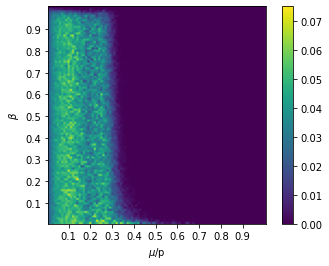

In [4]:
#plt.figure(figsize =(12,9))
plt.imshow(np.array(df30000).T/1000 ,origin = 'lower')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$\beta$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.show()
#plt.savefig("Images/global_beta_vs_mu_n1000_p100_t30000.png")

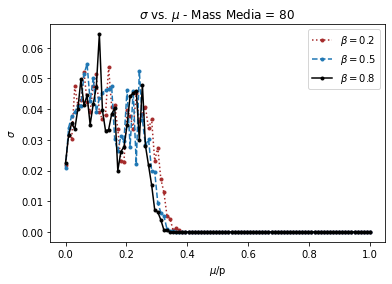

In [5]:
plt.plot(np.linspace(0,1,100),np.array(df30000).T[19]/1000,'.:',color = 'brown',label = r'$\beta = 0.2$')
plt.plot(np.linspace(0,1,100),np.array(df30000).T[49]/1000,'.--',label = r'$\beta = 0.5$')
plt.plot(np.linspace(0,1,100),np.array(df30000).T[79]/1000,'.-', color = 'black',label = r'$\beta = 0.8$')
plt.xlabel(r'$\mu$/p')
plt.ylabel(r'$\sigma$')
plt.title(r'$\sigma$ vs. $\mu$ - Mass Media = 80 ')
plt.legend()
plt.show()
#plt.savefig("Images/profile_sigma_vs_mu_n1000_p100_t30000.png")

## Smax vs. $\mu$

In [16]:
df_30000smax = pd.read_csv('data_analyzed/smax_data_n1000_p100_t30000.csv')
df30000smax = df_30000smax.to_numpy().tolist()

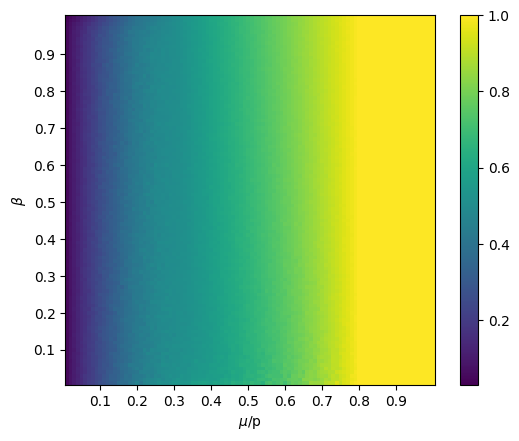

In [23]:
#plt.figure(figsize =(12,9))
plt.imshow(np.array(df30000smax).T/1000 ,origin = 'lower')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$\beta$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.show()
#plt.savefig("Images/global_smax_beta_vs_mu_n1000_p100_t30000.png")

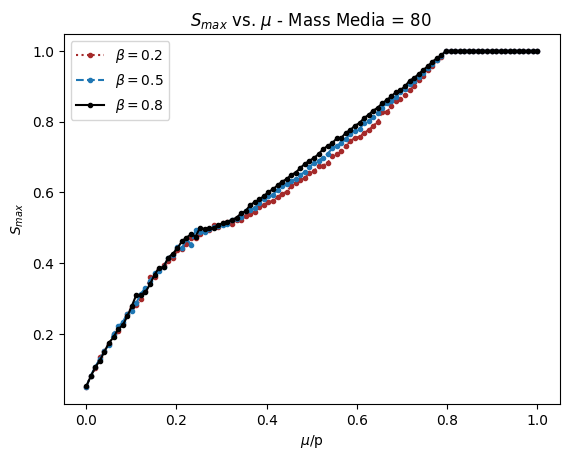

In [25]:
plt.plot(np.linspace(0,1,100),np.array(df30000smax).T[19]/1000,'.:',color = 'brown',label = r'$\beta = 0.2$')
plt.plot(np.linspace(0,1,100),np.array(df30000smax).T[49]/1000,'.--',label = r'$\beta = 0.5$')
plt.plot(np.linspace(0,1,100),np.array(df30000smax).T[79]/1000,'.-', color = 'black',label = r'$\beta = 0.8$')
plt.xlabel(r'$\mu$/p')
plt.ylabel(r'$S_{max}$')
plt.title(r'$S_{max}$ vs. $\mu$ - Mass Media = 80 ')
plt.legend()
plt.show()
#plt.savefig("Images/profile_smax_vs_mu_n1000_p100_t30000.png")

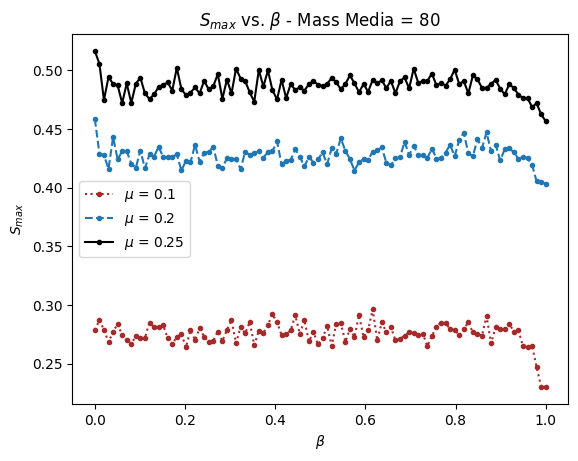

In [27]:
plt.plot(np.linspace(0,1,100),np.array(df30000smax)[10]/1000,'.:',color = 'brown',label = r'$\mu$ = 0.1')
plt.plot(np.linspace(0,1,100),np.array(df30000smax)[19]/1000,'.--',label = r'$\mu$ = 0.2')
plt.plot(np.linspace(0,1,100),np.array(df30000smax)[25]/1000,'.-', color = 'black',label = r'$\mu$ = 0.25')
plt.title(r'$S_{max}$ vs. $\beta$ - Mass Media = 80 ')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$S_{max}$')
plt.legend()
plt.show()
#plt.savefig("Images/profile_smax_vs_beta_n1000_p100_t30000.png")

## Sprop vs. $\mu$

In [28]:
df_30000sprop = pd.read_csv('data_analyzed/sprop_data_n1000_p100_t30000.csv')
df30000sprop = df_30000sprop.to_numpy().tolist()

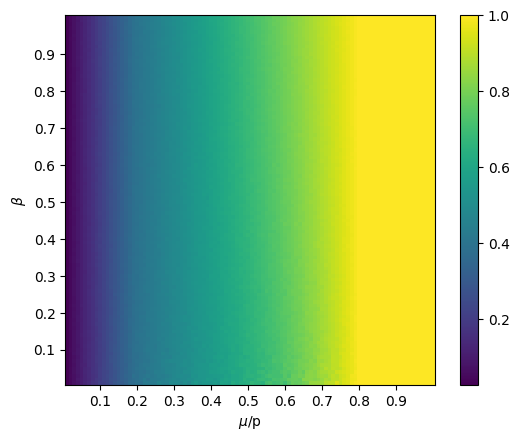

In [34]:
#plt.figure(figsize =(12,9))
plt.imshow(np.array(df30000sprop).T/1000 ,origin = 'lower')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$\beta$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.show()
#plt.savefig("Images/global_sprop_beta_vs_mu_n1000_p100_t30000.png")

## Propaganda = 99

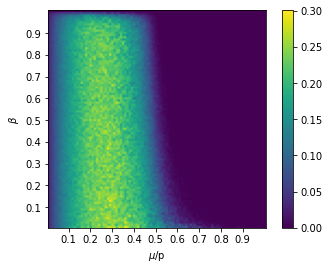

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_30000 = pd.read_csv('data_analyzed/sigma_data_n1000_p100_t50000.csv')
df30000 = df_30000.to_numpy().tolist()

#plt.figure(figsize =(12,9))
plt.imshow(np.array(df30000).T/1000 ,origin = 'lower')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$\beta$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.show()
#plt.savefig("Images/global_beta_vs_mu_n1000_p100_prop99.png")

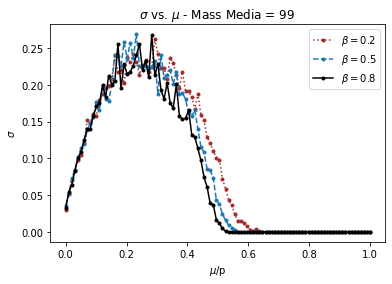

In [8]:

plt.plot(np.linspace(0,1,100),np.array(df30000).T[19]/1000,'.:',color = 'brown',label = r'$\beta = 0.2$')
plt.plot(np.linspace(0,1,100),np.array(df30000).T[49]/1000,'.--',label = r'$\beta = 0.5$')
plt.plot(np.linspace(0,1,100),np.array(df30000).T[79]/1000,'.-', color = 'black',label = r'$\beta = 0.8$')
#plt.plot(np.linspace(0,1,100),np.array(df1).T[15],label = '15')
#plt.plot(np.linspace(0,1,100),np.array(df1).T[25],label = '25')
plt.xlabel(r'$\mu$/p')
plt.ylabel(r'$\sigma$')
plt.title(r'$\sigma$ vs. $\mu$ - Mass Media = 99 ')
plt.legend()
plt.show()
#plt.savefig("Images/profile_sigma_vs_mu_n1000_p100_prop99.png")

## $S_{max}$ vs. $\mu$

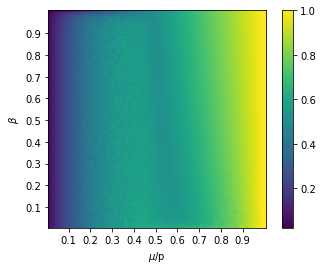

In [10]:
dfsmax = pd.read_csv('data_analyzed/smax_data_n1000_p100_t50000.csv')
dfsmax = dfsmax.to_numpy().tolist()

#plt.figure(figsize =(12,9))
plt.imshow(np.array(dfsmax).T/1000 ,origin = 'lower')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$\beta$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.show()
#plt.savefig("Images/global_smax_beta_vs_mu_n1000_p100_prop99.png")

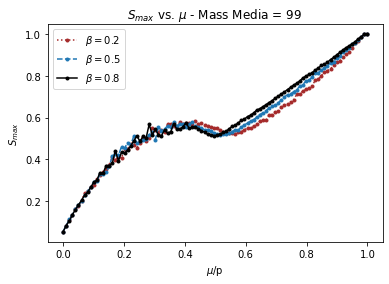

In [11]:

plt.plot(np.linspace(0,1,100),np.array(dfsmax).T[19]/1000,'.:',color = 'brown',label = r'$\beta = 0.2$')
plt.plot(np.linspace(0,1,100),np.array(dfsmax).T[49]/1000,'.--',label = r'$\beta = 0.5$')
plt.plot(np.linspace(0,1,100),np.array(dfsmax).T[79]/1000,'.-', color = 'black',label = r'$\beta = 0.8$')

plt.xlabel(r'$\mu$/p')
plt.ylabel(r'$S_{max}$')
plt.title(r'$S_{max}$ vs. $\mu$ - Mass Media = 99 ')
plt.legend()
plt.show()
#plt.savefig("Images/profile_smax_vs_mu_n1000_p100_prop99.png")

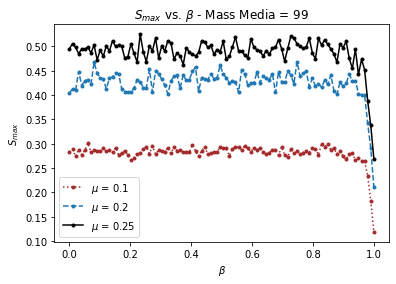

In [12]:
plt.plot(np.linspace(0,1,100),np.array(dfsmax)[10]/1000,'.:',color = 'brown',label = r'$\mu$ = 0.1')
plt.plot(np.linspace(0,1,100),np.array(dfsmax)[19]/1000,'.--',label = r'$\mu$ = 0.2')
plt.plot(np.linspace(0,1,100),np.array(dfsmax)[25]/1000,'.-', color = 'black',label = r'$\mu$ = 0.25')
plt.title(r'$S_{max}$ vs. $\beta$ - Mass Media = 99 ')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$S_{max}$')
plt.legend()
plt.show()
#plt.savefig("Images/profile_smax_vs_beta_n1000_p100_prop99.png")

## Propaganda = 50

In [88]:
stot = []
ptot = []
for i in range(1,101):
    s = pd.read_csv(f"data/smax_vs_mu_i{i}_prop50.csv", header = None)
    p = pd.read_csv(f"data/sprop_vs_mu_i{i}_prop50.csv",header =None)
    
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

/tmp/ipykernel_249/2095701698.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stot = np.array(stot)
/tmp/ipykernel_249/2095701698.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ptot = np.array(ptot)


In [93]:
sigma_dat = pd.DataFrame(list(stot-ptot))

sigma_dat.to_csv('data_analyzed/sigma_data_n1000_p100_prop50.csv', index = None, header = None)

In [94]:
sigma_dat

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,NaN,7.843137,8.627451,22.313725,30.529412,35.666667,41.862745,56.176471,51.098039,51.274510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,NaN,8.431373,8.431373,20.333333,32.215686,37.509804,44.235294,43.274510,45.568627,51.921569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,NaN,8.862745,8.098039,22.431373,32.627451,36.294118,39.039216,43.156863,38.529412,44.960784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,8.313725,9.176471,22.470588,30.431373,38.019608,37.568627,44.607843,46.470588,35.509804,58.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,8.823529,9.274510,22.333333,33.392157,33.196078,39.705882,51.549020,45.549020,56.725490,44.941176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,8.921569,9.019608,23.235294,30.117647,34.058824,37.568627,44.823529,41.294118,43.098039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
96,NaN,8.411765,8.647059,21.862745,31.058824,33.450980,44.019608,39.823529,36.509804,45.764706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
97,NaN,5.549020,8.941176,17.254902,27.372549,37.705882,39.078431,41.764706,48.764706,40.941176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
98,NaN,2.647059,9.372549,11.607843,21.803922,31.862745,35.000000,36.431373,34.235294,42.725490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [76]:
stot = []
ptot = []
for i in range(1,100):
    s = pd.read_csv(f"data/smax_vs_mu_i{i}_prop50.csv")
    p = pd.read_csv(f"data/sprop_vs_mu_i{i}_prop50.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

#stot = np.array(stot) 
#ptot = np.array(ptot)
stot
plt.imshow((stot - ptot)/1000,origin = "lower")

TypeError: unsupported operand type(s) for -: 'list' and 'list'

## Combined Plot

In [2]:
df_prop80 = pd.read_csv('data_analyzed/sigma_data_n1000_p100_t30000.csv')
df_80 = df_prop80.to_numpy()

df_prop99= pd.read_csv('data_analyzed/sigma_data_n1000_p100_t50000.csv')
df_99= df_prop99.to_numpy()

df_prop50= pd.read_csv('data_analyzed/sigma_data_n1000_p100_prop50.csv', header = None)
df_prop2 = df_prop50.drop([101], axis =1).drop([100],axis =1)
df_50= df_prop2.to_numpy()
df_prop2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,7.843137,8.627451,22.313725,30.529412,35.666667,41.862745,56.176471,51.098039,51.274510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,8.431373,8.431373,20.333333,32.215686,37.509804,44.235294,43.274510,45.568627,51.921569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,8.862745,8.098039,22.431373,32.627451,36.294118,39.039216,43.156863,38.529412,44.960784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.313725,9.176471,22.470588,30.431373,38.019608,37.568627,44.607843,46.470588,35.509804,58.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.823529,9.274510,22.333333,33.392157,33.196078,39.705882,51.549020,45.549020,56.725490,44.941176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\RAUL\AppData\Local\Temp\ipykernel_4024\167396881.py:19: RuntimeWarning: divide by zero encountered in log
  heatmap1 = ax1.imshow(np.log(df_80.T/1000), cmap='magma', origin='lower', vmax=vmax)
C:\Users\RAUL\AppData\Local\Temp\ipykernel_4024\167396881.py:21: RuntimeWarning: divide by zero encountered in log
  heatmap2 = ax2.imshow(np.log(df_99.T/1000), cmap='magma', origin='lower', vmax=vmax)
C:\Users\RAUL\AppData\Local\Temp\ipykernel_4024\167396881.py:23: RuntimeWarning: divide by zero encountered in log
  heatmap3 = ax3.imshow(np.log(df_50/1000), cmap='magma', origin='lower', vmax=vmax)


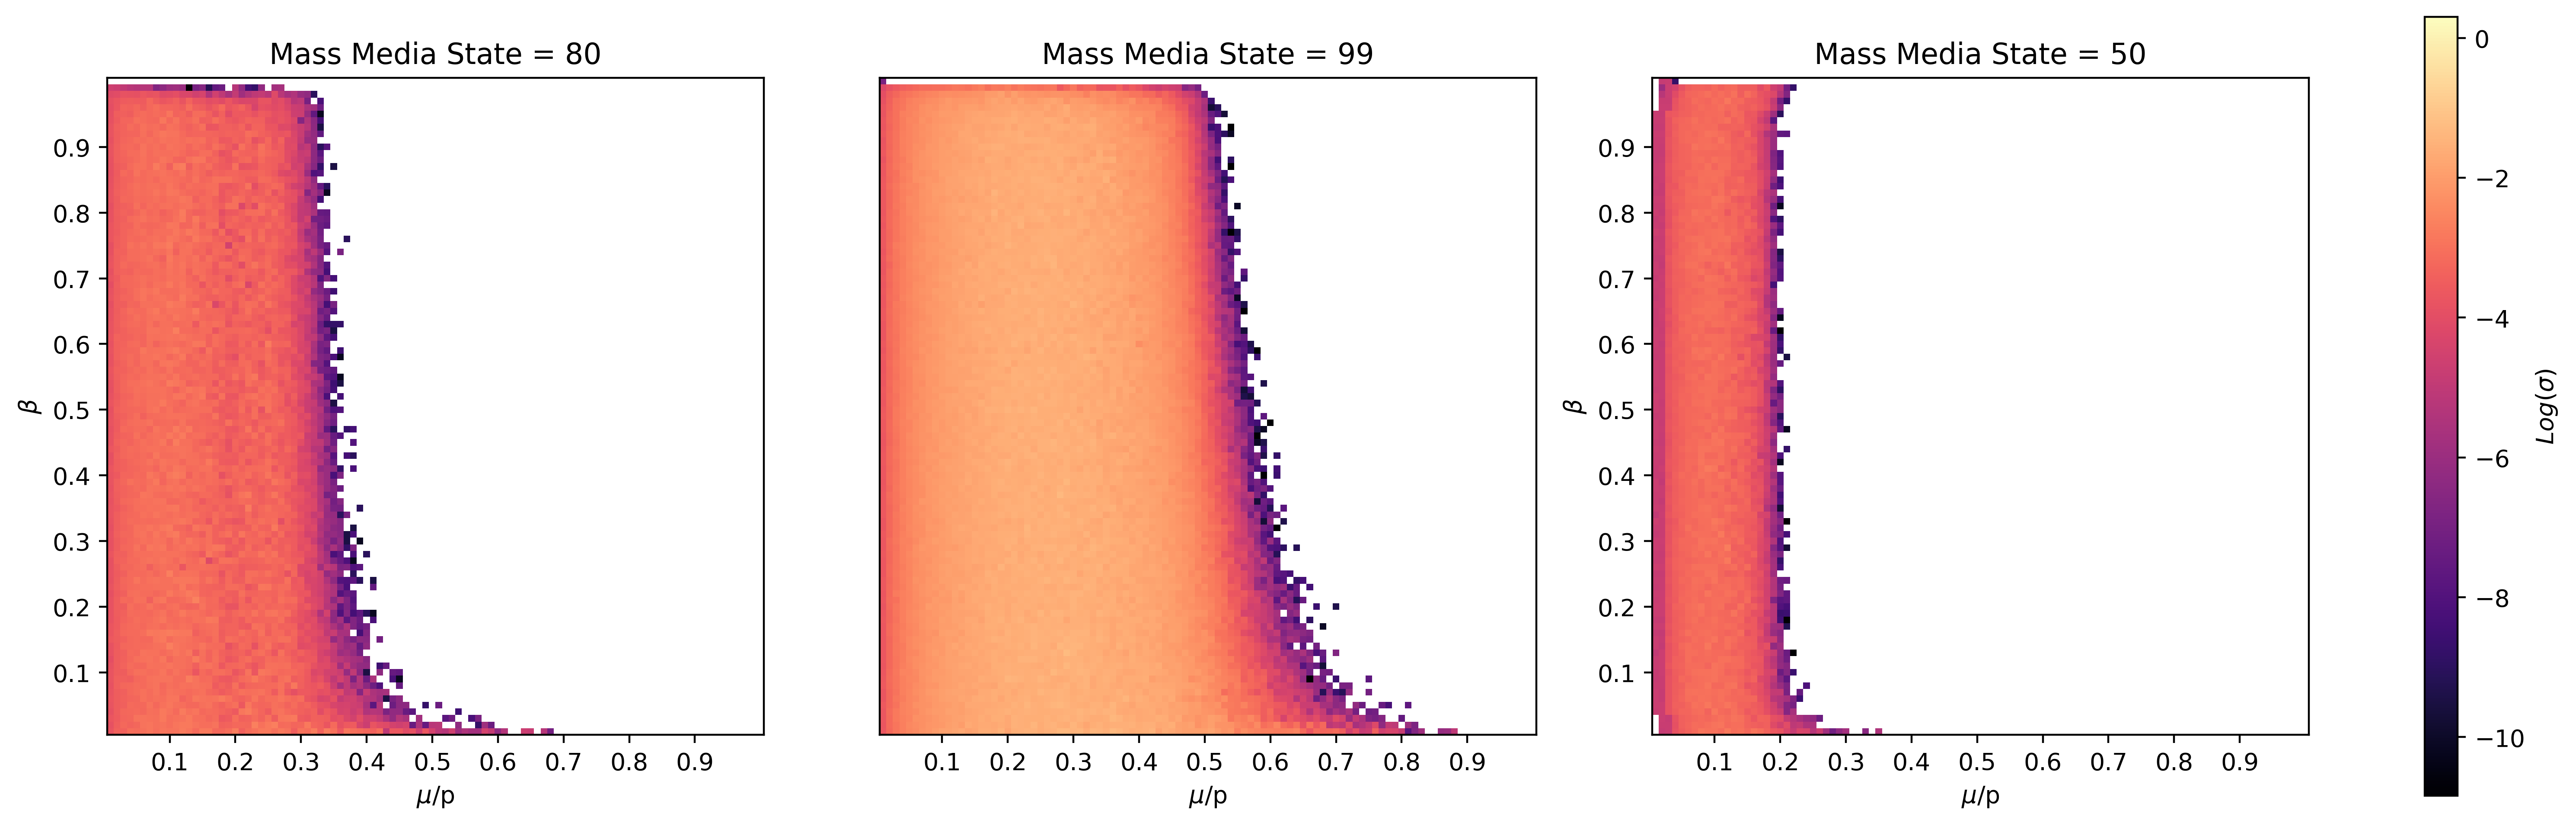

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Calcular el valor máximo para normalizar los colores en todos los heatmaps
vmax = max((df_80/1000).max(), (df_99/1000).max(), (df_50/1000).max())

# Crear una figura y un objeto GridSpec para organizar los subplots
fig = plt.figure(figsize=(15, 5),dpi = 400)
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])  # El último valor es para el ancho del colorbar

# Crear los subplots de los heatmaps
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# Mostrar los heatmaps en los subplots con la misma escala de colores
heatmap1 = ax1.imshow(np.log(df_80.T/1000), cmap='magma', origin='lower', vmax=vmax)

heatmap2 = ax2.imshow(np.log(df_99.T/1000), cmap='magma', origin='lower', vmax=vmax)

heatmap3 = ax3.imshow(np.log(df_50/1000), cmap='magma', origin='lower', vmax=vmax)


# Ocultar los ticks de los subplots intermedios
ax2.set_yticks([])
ax2.set_xticks([])

ax1.set_xlabel(r"$\mu$/p")
ax2.set_xlabel(r"$\mu$/p")
ax3.set_xlabel(r"$\mu$/p")
ax1.set_ylabel(r"$\beta$")
ax3.set_ylabel(r"$\beta$")

ax1.set_xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
ax2.set_xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
ax3.set_xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
ax1.set_yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
ax3.set_yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])

ax1.set_title('Mass Media State = 80')
ax2.set_title('Mass Media State = 99')
ax3.set_title('Mass Media State = 50')

# Agregar el colorbar al lado del último subplot
cbar_ax = fig.add_subplot(gs[3])
cbar = fig.colorbar(heatmap3, cax=cbar_ax, label = '$Log(\sigma)$')



# Ajustar el espacio entre los subplots para que no se superpongan
plt.tight_layout()

plt.savefig('Images/combinened_logplot_prop80-99-50.png', dpi = 400)
#plt.show()


In [9]:
import os
dat = []
for inten in range(1,101,1):
    if os.path.isfile(f"data/smax_vs_mu_i{inten}_prop50.csv"):
        s = pd.read_csv(f"data/smax_vs_mu_i{inten}_prop50.csv")
        dat.append(s)
    else: 
        print("Is lacking: ", inten)

Is lacking:  100


In [3]:
import discrete_opinion as do
ob1 = do.Global(size =1000, options= 100)

def most_frequent_value(arr,propaganda):
    values, counts = np.unique(arr, return_counts=True)
    smax = np.max(counts)
    sprop_index = np.where(values == propaganda)[0][0]
    sprop = counts[sprop_index]
    
    return smax, sprop

In [4]:
tol = np.arange(0,100,1) # Tolerance
resres1 = []
resres2 = []
for rep in range(36,50):
    res1 = np.empty(100) #Save smax
    res2 = np.empty(100) #Save sprop
    for i in tol:
        lisq = ob1.simul_global_evol(i, 99/100, 150000, 50)
        smax, sprop = most_frequent_value(lisq,50)
        res1[i] = smax
        res2[i] = sprop
    resres1.append(res1)
    resres2.append(res2)
    print("Ready for rep: ", rep)


mean_res1 = np.mean(resres1, axis =0)
mean_res2 = np.mean(resres2, axis =0)

Ready for rep:  36
Ready for rep:  37
Ready for rep:  38
Ready for rep:  39
Ready for rep:  40
Ready for rep:  41
Ready for rep:  42
Ready for rep:  43
Ready for rep:  44
Ready for rep:  45
Ready for rep:  46
Ready for rep:  47
Ready for rep:  48
Ready for rep:  49


In [8]:
smax_data = pd.DataFrame(resres1, index = None)
sprop_data = pd.DataFrame(resres2, index = None)

smax_data.to_csv('data/smax_vs_mu_i99_prop50.csv')
sprop_data.to_csv('data/sprop_vs_mu_i99_prop50.csv')

In [5]:
partial_data_smax = pd.read_csv('data/smax_vs_mu_i99_prop50.csv')
partial_data_sprop = pd.read_csv('data/sprop_vs_mu_i99_prop50.csv')

partial_data_smax = partial_data_smax.values.tolist()
partial_data_sprop = partial_data_sprop.values.tolist()

partial_data_smax += resres1
partial_data_sprop += resres2